In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/Users/amitpandey/TIPS.csv')

In [35]:
df.head()
#by this we get the first 5 cols

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
target = df['tip']   # -> dependent
features = df.drop('tip', axis = 1) # -> independent
#simply showing which is dependent and independent variable

In [37]:
target,features

(0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64,
      total_bill     sex smoker   day    time  size
 0         16.99  Female     No   Sun  Dinner     2
 1         10.34    Male     No   Sun  Dinner     3
 2         21.01    Male     No   Sun  Dinner     3
 3         23.68    Male     No   Sun  Dinner     2
 4         24.59  Female     No   Sun  Dinner     4
 ..          ...     ...    ...   ...     ...   ...
 239       29.03    Male     No   Sat  Dinner     3
 240       27.18  Female    Yes   Sat  Dinner     2
 241       22.67    Male    Yes   Sat  Dinner     2
 242       17.82    Male     No   Sat  Dinner     2
 243       18.78  Female     No  Thur  Dinner     2
 
 [244 rows x 6 columns])

In [38]:
#Here we are gonna clean the data

In [39]:
df.isnull().sum()
#checking for any null value 
#but there isnt

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
df.info()
#checking for categorical cols AND numerical cols
# categorical -> sex, smoker, day, time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# ~ Checking the values in categorical cols

In [41]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [44]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

# ~ Now, we gonna convert categoricals values into numericals
**By using encoding or one hot encoding**

In [72]:
# label encoding

from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['time']= label_encoder.fit_transform(df['time']) 
df['day']= label_encoder.fit_transform(df['day'])
df['day'].unique()



array([2, 1, 3, 0])

In [73]:
Sex

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
239,0,1
240,1,0
241,0,1
242,0,1


In [74]:
final_df = pd.concat([df, Sex, Smoker, Day, Time], axis=0)


In [75]:
final_df = final_df.fillna(value=0)

In [76]:
final_df

,total_bill,tip,sex,smoker,day,time,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
240,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
241,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
final_df.head()

,total_bill,tip,sex,smoker,day,time,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data visualization


In [53]:
final_df['tip'].skew()
#checking skewness

2.4874636677678414

In [56]:
df.columns.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [78]:
#making a function to check skewness for all cols
def left_or_right_skew(df,col):
    
    rs=final_df[value].skew()
    
   
    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"
        

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [80]:
cols = [
    'total_bill',
    'tip',
    'size'
    
]
for value in cols:
    
    print(value, "---->", left_or_right_skew(final_df,value))

total_bill ----> positive (+ve) skewed
tip ----> positive (+ve) skewed
size ----> positive (+ve) skewed


/Users/amitpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amitpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amitpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

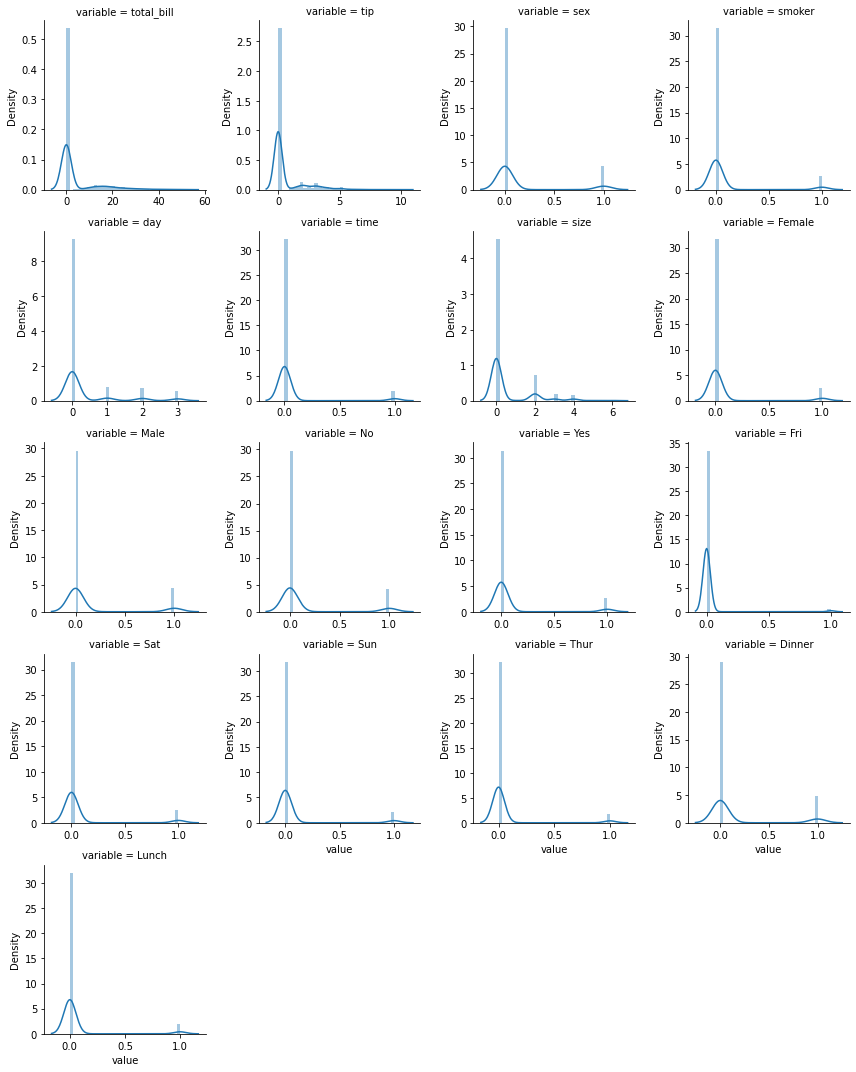

In [81]:
#histograph of categorical cols -> single
import seaborn as sns
num = [f for f in final_df.columns if final_df.dtypes[f] != 'object' ]
nd = pd.melt(final_df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
#boxplot for features~ to check for outliers

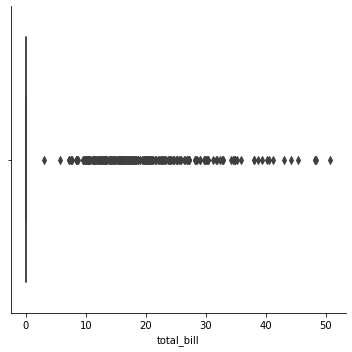

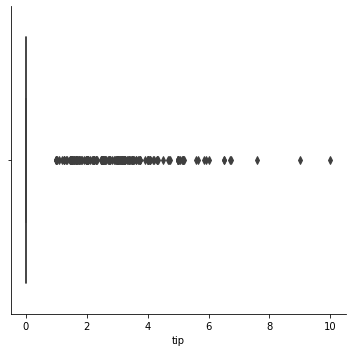

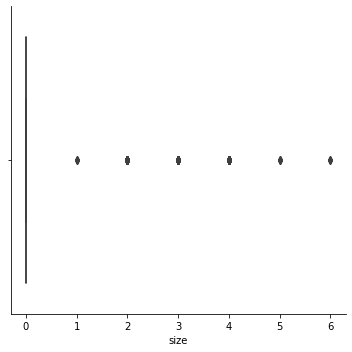

In [88]:
for value in cols:
    sns.catplot(data= final_df, x=value, kind="box")
    
# outliers present in total_bill, size

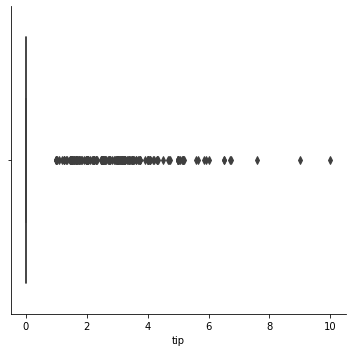

In [82]:
#boxplot for target
sns.catplot(data= final_df, x='tip', kind="box")

#outliers present in tip



In [83]:
#OUTLIERS TREATMENT   (i didnt get this part), im confused here
def ul_ll_iqr(df,col):
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    ul = q3+1.5*IQR
    ll = q1-1.5*IQR
    
    lon_data = df[col]
    outliers = lon_data[(lon_data > ul) | (lon_data < ll)]
    
    return ul, ll

In [84]:
u, l = ul_ll_iqr(final_df,'total_bill')


In [85]:
u, l

(0.0, 0.0)

In [86]:
temp_df = final_df[final_df['total_bill']< u]

In [89]:
from scipy import stats
z=np.abs(stats.zscore(final_df['total_bill']))
print(z)

0      1.471690
1      0.720759
2      1.925636
3      2.227138
4      2.329897
         ...   
239    0.446853
240    0.446853
241    0.446853
242    0.446853
243    0.446853
Name: total_bill, Length: 1220, dtype: float64


In [90]:
threshold=3
print(np.where(z>2))

(array([  3,   4,   5,   7,  11,  23,  28,  35,  39,  44,  46,  47,  48,
        52,  54,  56,  57,  59,  72,  73,  77,  78,  83,  85,  88,  90,
        91,  94,  95,  96, 102, 103, 107, 112, 113, 114, 116, 119, 125,
       129, 141, 142, 143, 153, 155, 156, 157, 165, 167, 170, 173, 175,
       179, 180, 181, 182, 183, 184, 187, 189, 192, 197, 206, 207, 208,
       210, 211, 212, 214, 216, 219, 229, 230, 237, 238, 239, 240, 241]),)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


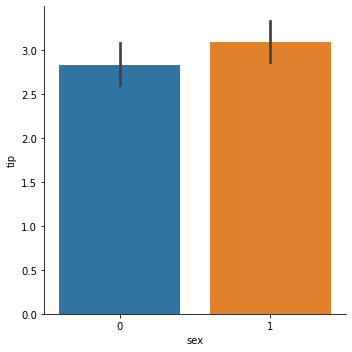

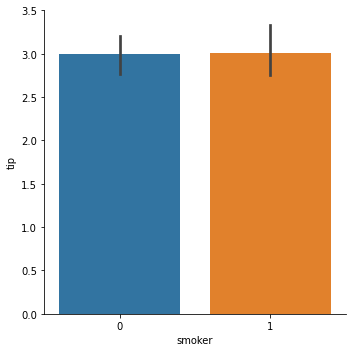

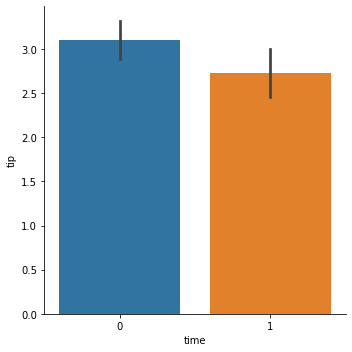

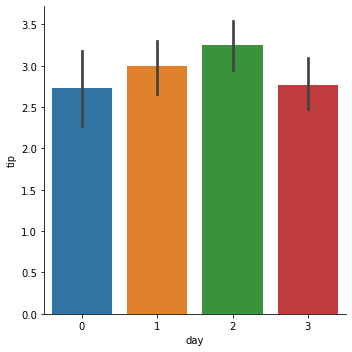

In [92]:
#BAR GRAPH FOR CATEGORICAL COLS wrt target
cat_cols = ['sex', 'smoker', 'time', 'day']
for value in cat_cols:
    sns.catplot(data=df, x = value, y = 'tip', kind = 'bar')


In [93]:
#BAR GRAPH OR FREQUENCIES of values in categorical cols

<AxesSubplot:>

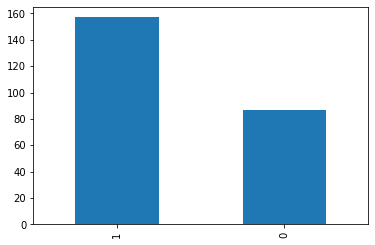

In [94]:
df["sex"].value_counts().plot(kind='bar')  

<AxesSubplot:>

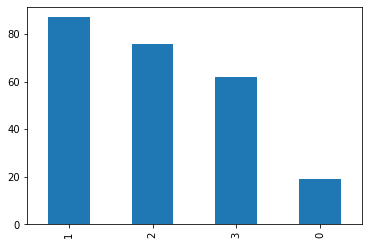

In [95]:
df["day"].value_counts().plot(kind='bar')  

<AxesSubplot:>

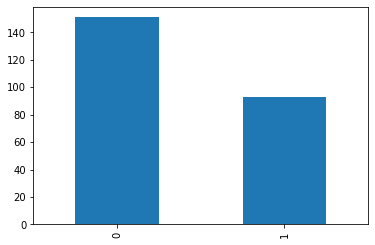

In [96]:
df["smoker"].value_counts().plot(kind='bar')  

<AxesSubplot:>

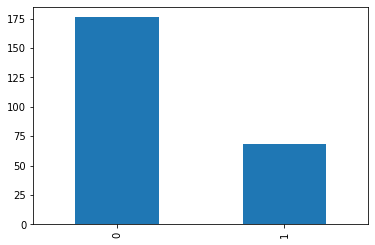

In [97]:
df["time"].value_counts().plot(kind='bar')  

In [98]:
#correlation btw target and features
corr_methods= {'pearson', 'kendall', 'spearman'} 

In [99]:
for value in corr_methods:
    print(value, "------------------------------------------------------------------------------\n")
    
    print(df.corr(method=value))

pearson ------------------------------------------------------------------------------

            total_bill       tip       sex    smoker       day      time  \
total_bill    1.000000  0.675734  0.144877  0.085721 -0.043550 -0.183118   
tip           0.675734  1.000000  0.088862  0.005929 -0.011548 -0.121629   
sex           0.144877  0.088862  1.000000  0.002816 -0.078292 -0.205231   
smoker        0.085721  0.005929  0.002816  1.000000 -0.282721 -0.054921   
day          -0.043550 -0.011548 -0.078292 -0.282721  1.000000  0.638019   
time         -0.183118 -0.121629 -0.205231 -0.054921  0.638019  1.000000   
size          0.598315  0.489299  0.086195 -0.133178  0.069510 -0.103411   

                size  
total_bill  0.598315  
tip         0.489299  
sex         0.086195  
smoker     -0.133178  
day         0.069510  
time       -0.103411  
size        1.000000  
kendall ------------------------------------------------------------------------------

            total_bill       ti

In [ ]:
#Correlation btw features columns

In [100]:

corr = final_df.corr()

#upper side = lower side

In [101]:
corr

,total_bill,tip,sex,smoker,day,time,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
total_bill,1.000000,0.933350,0.728504,0.544936,0.758505,0.362458,0.928503,-0.123825,-0.171731,-0.167944,-0.128364,-0.056204,-0.123825,-0.115175,-0.103397,-0.183473,-0.108566
tip,0.933350,1.000000,0.709381,0.513015,0.761793,0.383347,0.907251,-0.123183,-0.170840,-0.167073,-0.127698,-0.055913,-0.123183,-0.114578,-0.102860,-0.182521,-0.108003
sex,0.728504,0.709381,1.000000,0.443068,0.635355,0.258738,0.731475,-0.106495,-0.147695,-0.144438,-0.110398,-0.048338,-0.106495,-0.099055,-0.088925,-0.157794,-0.093371
smoker,0.544936,0.513015,0.443068,1.000000,0.375891,0.239881,0.489420,-0.079602,-0.110398,-0.107964,-0.082520,-0.036131,-0.079602,-0.074041,-0.066469,-0.117947,-0.069792
day,0.758505,0.761793,0.635355,0.375891,1.000000,0.702497,0.808320,-0.119138,-0.165231,-0.161587,-0.123506,-0.054077,-0.119138,-0.110816,-0.099483,-0.176528,-0.104456
time,0.362458,0.383347,0.258738,0.239881,0.702497,1.000000,0.414625,-0.067324,-0.093371,-0.091312,-0.069792,-0.030559,-0.067324,-0.062621,-0.056217,-0.099755,-0.059028
size,0.928503,0.907251,0.731475,0.489420,0.808320,0.414625,1.000000,-0.128062,-0.177607,-0.173691,-0.132757,-0.058128,-0.128062,-0.119116,-0.106935,-0.189751,-0.112281
Female,-0.123825,-0.123183,-0.106495,-0.079602,-0.119138,-0.067324,-0.128062,1.000000,-0.106495,-0.104146,-0.079602,-0.034854,-0.076787,-0.071423,-0.064119,-0.113776,-0.067324
Male,-0.171731,-0.170840,-0.147695,-0.110398,-0.165231,-0.093371,-0.177607,-0.106495,1.000000,-0.144438,-0.110398,-0.048338,-0.106495,-0.099055,-0.088925,-0.157794,-0.093371
No,-0.167944,-0.167073,-0.144438,-0.107964,-0.161587,-0.091312,-0.173691,-0.104146,-0.144438,1.000000,-0.107964,-0.047272,-0.104146,-0.096871,-0.086964,-0.154314,-0.091312


<AxesSubplot:>

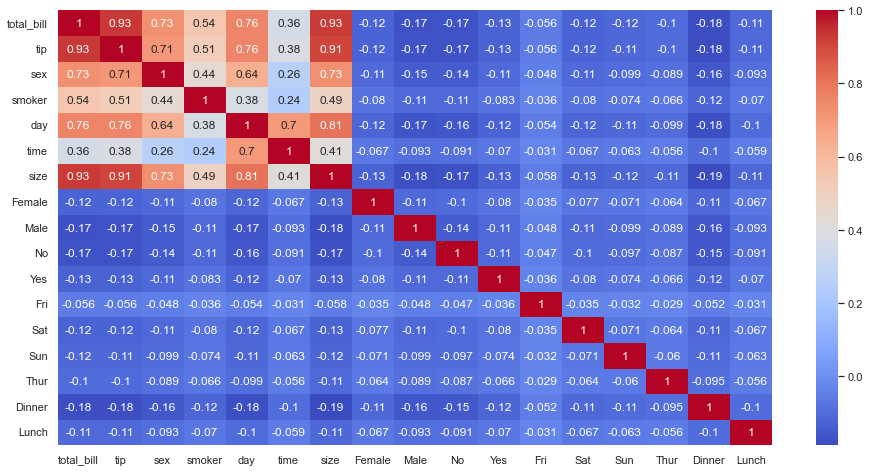

In [102]:
#HeatMap
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')

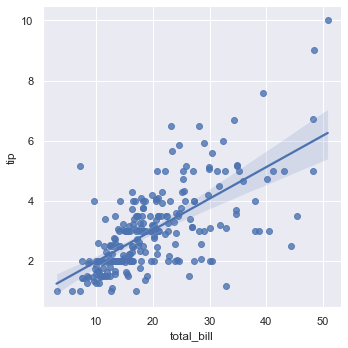

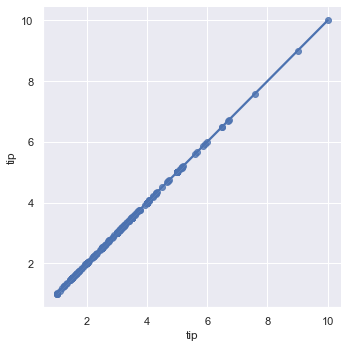

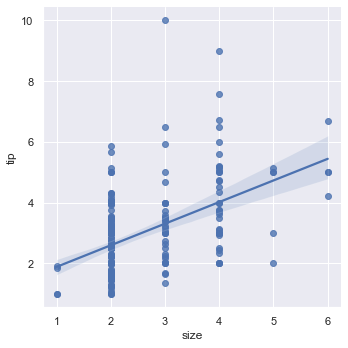

In [106]:
for value in cols:
    sns.lmplot(x=value, y='tip', data=df)

In [107]:
final_df

,total_bill,tip,sex,smoker,day,time,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
240,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
241,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
#Testing and fitting 

In [109]:
from sklearn.model_selection import train_test_split


In [110]:
X = df.drop(['tip'], axis=1)
y = df['tip']
#Here, we are splitting 

In [111]:
X, y


(     total_bill  sex  smoker  day  time  size
 0         16.99    0       0    2     0     2
 1         10.34    1       0    2     0     3
 2         21.01    1       0    2     0     3
 3         23.68    1       0    2     0     2
 4         24.59    0       0    2     0     4
 ..          ...  ...     ...  ...   ...   ...
 239       29.03    1       0    1     0     3
 240       27.18    0       1    1     0     2
 241       22.67    1       1    1     0     2
 242       17.82    1       0    1     0     2
 243       18.78    0       0    3     0     2
 
 [244 rows x 6 columns],
 0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64)

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# 70/30 

In [113]:
X_train, X_test, y_train, y_test 

(     total_bill  sex  smoker  day  time  size
 234       15.53    1       1    1     0     2
 227       20.45    1       0    1     0     4
 180       34.65    1       1    2     0     4
 5         25.29    1       0    2     0     4
 56        38.01    1       1    1     0     4
 ..          ...  ...     ...  ...   ...   ...
 106       20.49    1       1    1     0     2
 14        14.83    0       0    2     0     2
 92         5.75    0       1    0     0     2
 179       34.63    1       1    2     0     2
 102       44.30    0       1    1     0     3
 
 [170 rows x 6 columns],
      total_bill  sex  smoker  day  time  size
 24        19.82    1       0    1     0     2
 6          8.77    1       0    2     0     2
 153       24.55    1       0    2     0     4
 211       25.89    1       1    1     0     4
 198       13.00    0       1    3     1     2
 ..          ...  ...     ...  ...   ...   ...
 165       24.52    1       0    2     0     3
 154       19.77    1       0    

In [114]:
y_test

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
       ... 
165    3.48
154    2.00
216    3.00
79     2.71
29     3.00
Name: tip, Length: 74, dtype: float64

In [115]:
print(X_train.shape, X_test.shape )  # ---> Training Dataset ->Features

print(y_train.shape, y_test.shape )  # ---> Testing Dataset  ->Target

(170, 6) (74, 6)
(170,) (74,)


In [116]:
170+74,244*0.30,170/244*100

(244, 73.2, 69.67213114754098)

In [117]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [118]:
#put for training
reg_train = reg.fit(X_train, y_train)

In [119]:
reg_train

LinearRegression()

In [120]:
#prediction, whether 
prediction = reg_train.predict(X_test)

In [121]:
#this part is prediction   #this part is prediction   
prediction  ,     y_test 

(array([3.02176828, 1.87633238, 3.94167778, 3.84975127, 2.0504171 ,
        2.45261736, 3.6084352 , 2.30245754, 2.455197  , 2.302245  ,
        2.79326935, 2.15010026, 2.12619759, 2.1241767 , 1.79760149,
        3.16850198, 2.94400398, 3.11015198, 2.62629526, 5.95679789,
        3.58014354, 3.37444361, 2.11805185, 2.03259363, 2.94437851,
        2.29725221, 2.02080774, 3.17464834, 3.1653635 , 6.76214774,
        4.97115009, 1.5561348 , 3.37363588, 2.764912  , 2.86797829,
        3.96519826, 2.0504684 , 5.4959838 , 2.36795303, 2.99414624,
        2.12505786, 2.49894403, 3.33842305, 2.22843402, 1.86509916,
        0.76271751, 1.75975295, 3.18566247, 1.89946338, 2.3918557 ,
        3.14825329, 3.51930125, 4.63130685, 2.71045175, 2.90884964,
        2.42631687, 1.42780546, 2.82913446, 2.96679523, 2.59458652,
        4.65400466, 2.62799374, 2.97658134, 2.60877557, 3.06125821,
        3.05683184, 2.25635872, 1.46744741, 3.64444082, 3.66605598,
        3.48128296, 4.34015978, 2.8366269 , 2.93

In [122]:
#Checking for accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

#we are getting good prediction but lets go for R2_score

0.9344080935297541

In [123]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)
#Here we are not getting so let it be , our model is still giving us good prediction as above

0.2911426514546799

In [124]:
#scaling


In [125]:
X_test.iloc[38:45]

,total_bill,sex,smoker,day,time,size
139,13.16,0,0,3,1,2
241,22.67,1,1,1,0,2
75,10.51,1,0,1,0,2
127,14.52,0,0,3,1,2
113,23.95,1,0,2,0,2
16,10.33,0,0,2,0,3
196,10.34,1,1,3,1,2


In [126]:
#
df.iloc[38:45]

,total_bill,tip,sex,smoker,day,time,size
38,18.69,2.31,1,0,1,0,3
39,31.27,5.00,1,0,1,0,3
40,16.04,2.24,1,0,1,0,3
41,17.46,2.54,1,0,2,0,2
42,13.94,3.06,1,0,2,0,2
43,9.68,1.32,1,0,2,0,2
44,30.40,5.60,1,0,2,0,4


In [127]:
reg_train.predict(X_test.iloc[38:45])


#what we are trying to check is the difference btw real or true dataset and predict data set

#which isnt of that much


array([2.36795303, 2.99414624, 2.12505786, 2.49894403, 3.33842305,
       2.22843402, 1.86509916])

# ~ NOW THAT WE HAVE A MODEL WE HAVE TO SAVE IT SO WE CAN CALL IT WHENEVER NEEDED !!!

In [128]:
import pickle

In [129]:
pickle.dump(reg_train, open('tip_prediction_model_regression.pkl', 'wb'))

In [135]:
final_df

,total_bill,tip,sex,smoker,day,time,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
240,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
241,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
sex,smoker,day,time

(     0  1
 0    1  0
 1    0  1
 2    0  1
 3    0  1
 4    1  0
 ..  .. ..
 239  0  1
 240  1  0
 241  0  1
 242  0  1
 243  1  0
 
 [244 rows x 2 columns],
      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 ..  .. ..
 239  1  0
 240  0  1
 241  0  1
 242  1  0
 243  1  0
 
 [244 rows x 2 columns],
      0  1  2  3
 0    0  0  1  0
 1    0  0  1  0
 2    0  0  1  0
 3    0  0  1  0
 4    0  0  1  0
 ..  .. .. .. ..
 239  0  1  0  0
 240  0  1  0  0
 241  0  1  0  0
 242  0  1  0  0
 243  0  0  0  1
 
 [244 rows x 4 columns],
      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 ..  .. ..
 239  1  0
 240  1  0
 241  1  0
 242  1  0
 243  1  0
 
 [244 rows x 2 columns])